In [ ]:
#Importing libraries necessary for data cleaning

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset from a CSV file

stock_data = pd.read_csv("C:\\Users\\roni2\\OneDrive\\Documents\\WSO courses\\WSO - Python Fundementals\\VS Code\\Machine learning\\stock_data_v2.csv")

In [ ]:
#Exploring the dataset to identify inconsistencies in the 'Sector' column

stock_data.Sector.unique()

array(['Information Technology', 'Consumer Discretionary', 'Financials',
       'Health Care', 'Energy', 'Consumer Staples', nan,
       'Telecommunication Services', 'Industrials',
       'Information Technology .', 'Materials', 'Industrial$',
       'Utilities', 'Enersy', 'lndustrials', 'Real Estate'], dtype=object)

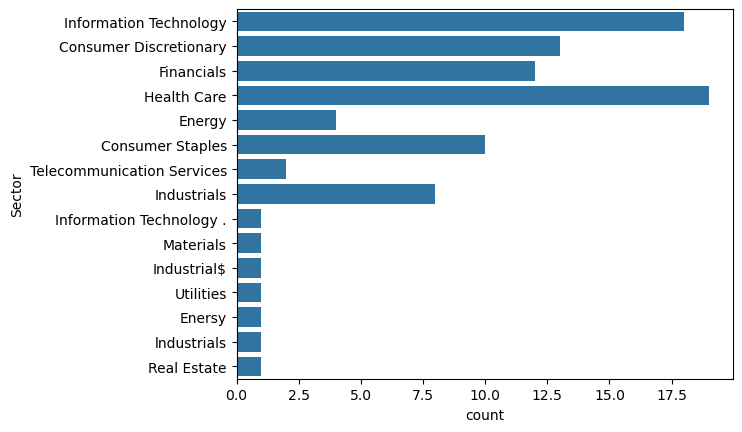

In [ ]:
#Visually exploring the dataset to identify inconsistencies in the 'Sector' column with greater impact
sns.countplot(y="Sector", data=stock_data)
plt.show()

C:\Users\roni2\AppData\Local\Temp\ipykernel_45360\3743037922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data['Sector'].replace("Information Technology .", "Information Technology", inplace=True)
C:\Users\roni2\AppData\Local\Temp\ipykernel_45360\3743037922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

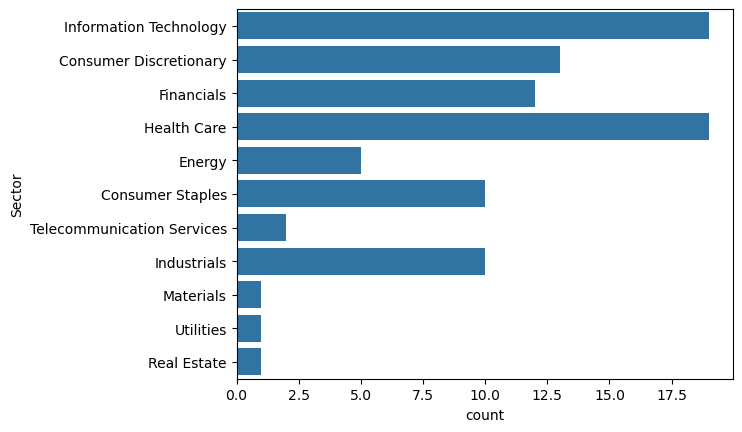

In [ ]:
#Cleaning the 'Sector' column by replacing inconsistent entries with correct ones

stock_data['Sector'].replace("Information Technology .", "Information Technology", inplace=True)
stock_data['Sector'].replace("Enersy", "Energy", inplace=True)
stock_data['Sector'].replace(["Industrial$", "lndustrials"], "Industrials", inplace=True)

sns.countplot(y="Sector", data=stock_data)
plt.show()

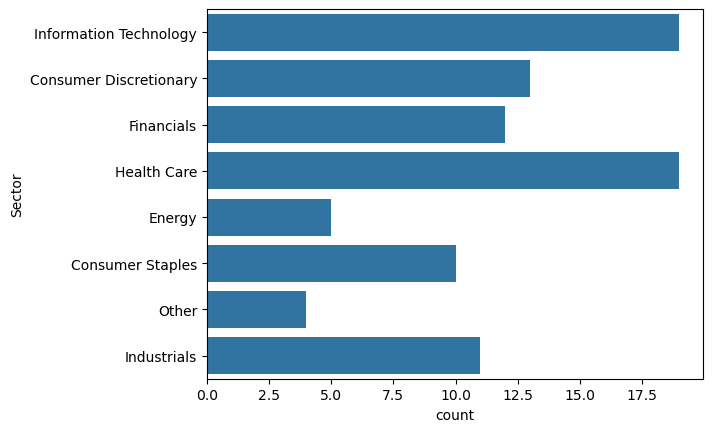

In [ ]:
#Further cleaning by consolidating less significant sectors into an 'Other' category

stock_data.Sector.replace("Materials", "Industrials", inplace=True)
stock_data.Sector.replace(["Telecommunication Services", "Utilities", "Real Estate"], "Other", inplace=True)

sns.countplot (y='Sector', data=stock_data)
plt.show()

In [ ]:
#Checking the shape of the cleaned dataset

stock_data.shape

(100, 9)

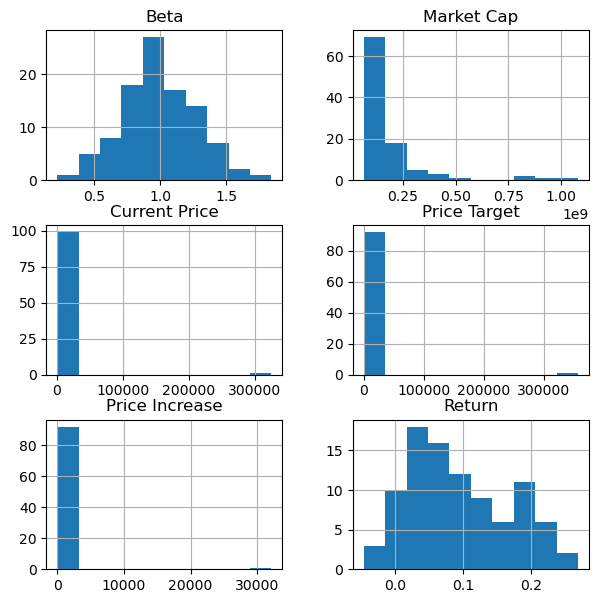

In [ ]:
#Visualizing the distribution of numerical features in the dataset using histograms to identify any anomalies or outliers

stock_data.hist(figsize=(7,7))
plt.show()

In [ ]:
#Identifying potential outliers in the 'Current Price' column by filtering for values greater than 300,000

stock_data[stock_data['Current Price'] > 300000]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.0,357125.0,32126.0,0.099


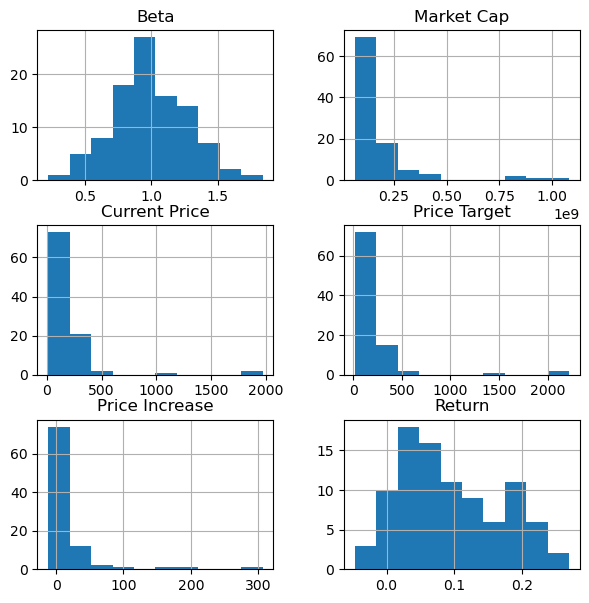

In [ ]:
#Removing the identified outliers and re-plotting the histograms to confirm their removal

stock_data_sans_brk = stock_data[stock_data['Current Price'] < 300000]

stock_data_sans_brk.hist(figsize=(7, 7))

plt.show()

In [ ]:
#Further investigating the 'Current Price' column for any additional outliers by filtering for values greater than 1,000

stock_data[stock_data['Current Price'] > 1000]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
1,AMZN,AMAZON.COM INC,Consumer Discretionary,1.23,960942834,1970.19,2133.39,163.20,0.083
3,GOOGL,ALPHABET INC-A,Information Technology,1.44,817459888,1177.98,1384.89,206.91,0.176
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.00,357125.00,32126.00,0.099
66,BKNG,BOOKING HOLDINGS,Consumer Discretionary,0.74,90969219,1916.27,2222.78,306.51,0.160


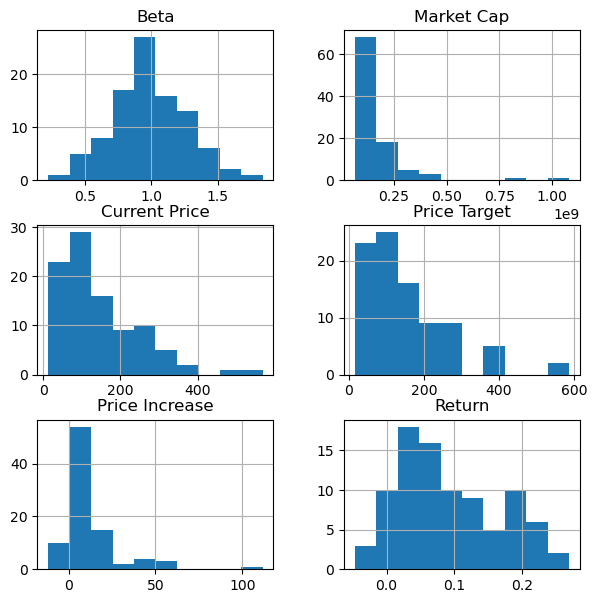

In [ ]:
#Removing these additional outliers and re-plotting the histograms to confirm their removal

stock_data_less_1000 = stock_data[stock_data["Current Price"] < 1000]
stock_data_less_1000.hist(figsize=(7,7))
plt.show()

In [ ]:
#Final overview of the cleaned dataset using descriptive statistics, count inconsistent for columns 
stock_data.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,100.000000,1.000000e+02,100.000000,93.000000,93.000000,93.000000
mean,0.995800,1.756136e+08,3441.165500,4051.011720,364.757312,0.093785
std,0.283446,1.806083e+08,32481.881894,37011.566893,3329.559536,0.073745
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.047000
25%,0.810000,8.195384e+07,69.630000,74.530000,3.880000,0.035000
50%,0.990000,1.119556e+08,117.600000,123.930000,8.930000,0.079000
75%,1.182500,1.987309e+08,219.430000,217.130000,16.560000,0.149000
max,1.840000,1.081131e+09,324999.000000,357125.000000,32126.000000,0.270000


In [ ]:
#Checking for any remaining missing values in the 'Price Target' column
stock_data[pd.isnull(stock_data["Price Target"])]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
12,SPY,SPDR S&P 500 ETF,NaN,1.00,270949532,290.88,NaN,NaN,NaN
31,IW,ISHARES-C S&P500,NaN,1.01,164820451,292.91,NaN,NaN,NaN
54,VTI,VANGUARD TL SK E,NaN,0.98,106340549,150.28,NaN,NaN,NaN
55,VOO,VANGUARD S&P 500,NaN,0.99,104131469,267.36,NaN,NaN,NaN
81,QQQ,INVESCO QQQ TRUS,NaN,1.22,71443317,183.99,NaN,NaN,NaN
83,EFA,ISHARES MSCI EAF,NaN,0.76,69817606,66.76,NaN,NaN,NaN
84,VEA,VANGUARD FTSE ET,NaN,0.76,69795021,42.71,NaN,NaN,NaN


In [ ]:
#Removing rows with any missing values to ensure data integrity

stock_data = stock_data.dropna()
stock_data.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000
mean,0.998495,1.796136e+08,3686.254409,4051.011720,364.757312,0.093785
std,0.291010,1.857849e+08,33682.068837,37011.566893,3329.559536,0.073745
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.047000
25%,0.810000,8.270243e+07,69.980000,74.530000,3.880000,0.035000
50%,0.990000,1.164038e+08,114.570000,123.930000,8.930000,0.079000
75%,1.190000,2.067081e+08,209.070000,217.130000,16.560000,0.149000
max,1.840000,1.081131e+09,324999.000000,357125.000000,32126.000000,0.270000


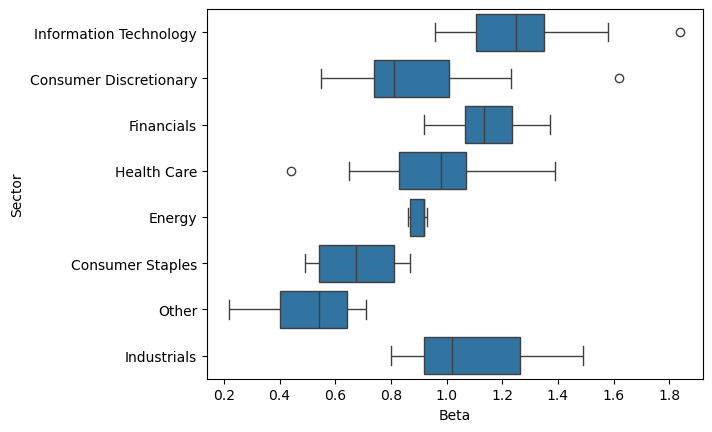

In [ ]:
#Visualizing the distribution of the 'Beta' column across different sectors using a boxplot to identify any sector-specific trends or outliers

sns.boxplot( y = 'Sector', x = 'Beta', data= stock_data)
plt.show()

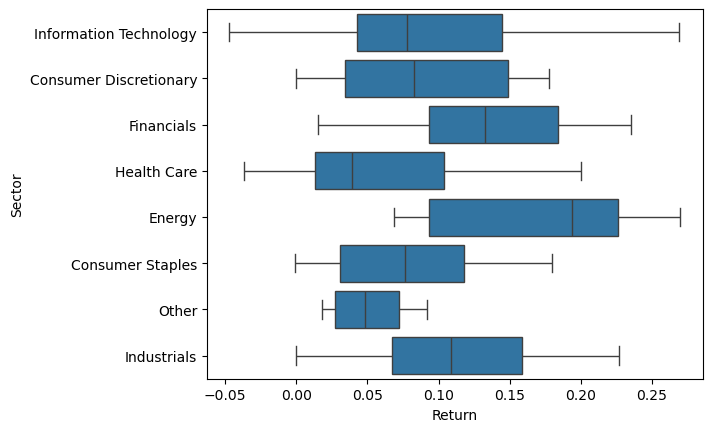

In [ ]:
#Visualizing the distribution of the 'Return' column across different sectors using a boxplot to identify any sector-specific trends or outliers

sns.boxplot( y = 'Sector', x = 'Return', data= stock_data)
plt.show()

In [ ]:
#Saving the cleaned dataset to a new CSV file for future use

stock_data.to_csv("C:\\Users\\roni2\\OneDrive\\Documents\\WSO courses\\WSO - Python Fundementals\\VS Code\\Machine learning\\stock_data_exercise.csv", index=None)